<a href="https://colab.research.google.com/github/Kathy42xu/DL_TA/blob/main/TryMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MovieLens32M
It contains 32000204 ratings and 2000072 tag applications across 87585 movies

Each user is represented by an id, and no other information is provided.



In [2]:
import os

os.makedirs('movielens', exist_ok=True)


!wget -O movielens/ml-32m.zip https://files.grouplens.org/datasets/movielens/ml-32m.zip

!unzip movielens/ml-32m.zip -d movielens/


--2024-12-28 19:27:33--  https://files.grouplens.org/datasets/movielens/ml-32m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238950008 (228M) [application/zip]
Saving to: ‘movielens/ml-32m.zip’

movielens/ml-32m.zi 100%[===================>] 227.88M  57.3MB/s    in 4.5s    

2024-12-28 19:27:38 (51.1 MB/s) - ‘movielens/ml-32m.zip’ saved [238950008/238950008]

Archive:  movielens/ml-32m.zip
   creating: movielens/ml-32m/
  inflating: movielens/ml-32m/tags.csv  
  inflating: movielens/ml-32m/links.csv  
  inflating: movielens/ml-32m/README.txt  
  inflating: movielens/ml-32m/checksums.txt  
  inflating: movielens/ml-32m/ratings.csv  
  inflating: movielens/ml-32m/movies.csv  


#Inspect datafile


In [3]:
import pandas as pd

# Load the ratings data
ratings = pd.read_csv('movielens/ml-32m/ratings.csv')
print("Ratings Data:")
print(ratings.head())

# Load the movies data
movies = pd.read_csv('movielens/ml-32m/movies.csv')
print("\nMovies Data:")
print(movies.head())

# Load the tags data
tags = pd.read_csv('movielens/ml-32m/tags.csv')
print("\nTags Data:")
print(tags.head())

# Load the links data
links = pd.read_csv('movielens/ml-32m/links.csv')
print("\nLinks Data:")
print(links.head())



Ratings Data:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags Data:
   userId  movieId          tag   timestamp
0      22    26479  Kevin Kline  1583038886
1      22    79592     misogyny  1581476297
2    

In [6]:
# Get basic information about each dataset
print("\nRatings Summary:")
print(ratings.info())
print(ratings.describe())

print("\nMovies Summary:")
print(movies.info())

print("\nTags Summary:")
print(tags.info())

print("\nLinks Summary:")
print(links.info())



Ratings Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None
             userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5.794905e+04  5.095816e+04  1.058986e+00  2.561630e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    5.005300e+04  1.233000e+03  3.000000e+00  1.051012e+09
50%    1.002970e+05  3.452000e+03  3.500000e+00  1.272622e+09
75%    1.504510e+05  4.419900e+04  4.000000e+00  1.503158e+09
max    2.009480e+05  2.927570e+05  5.000000e+00  1.697164e+09

Movies Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (to

Merge


In [7]:
merged_data = ratings.merge(movies, on='movieId')

# Display the first few rows of the merged dataset
print(merged_data.head())

   userId  movieId  rating  timestamp  \
0       1       17     4.0  944249077   
1       1       25     1.0  944250228   
2       1       29     2.0  943230976   
3       1       30     5.0  944249077   
4       1       32     5.0  943228858   

                                               title  \
0                       Sense and Sensibility (1995)   
1                           Leaving Las Vegas (1995)   
2  City of Lost Children, The (Cité des enfants p...   
3  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
4          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                                   genres  
0                           Drama|Romance  
1                           Drama|Romance  
2  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
3                             Crime|Drama  
4                 Mystery|Sci-Fi|Thriller  


# time downsampling


In [8]:
import datetime


merged_data['year'] = pd.to_datetime(merged_data['timestamp'], unit='s').dt.year


all_ratings = merged_data[merged_data['year'] >= 2018]

print(f"amount of data after downsampling: {len(all_ratings)}")


amount of data after downsampling: 7411754


In [9]:
all_ratings['rating'].describe()

,rating
count,7.411754e+06
mean,3.571785e+00
std,1.057157e+00
min,5.000000e-01
25%,3.000000e+00
50%,3.500000e+00
75%,4.500000e+00
max,5.000000e+00


In [10]:
all_ratings['userId'].describe()
#total_user_id = len(all_ratings['userId'].unique())
#print(total_user_id)

,userId
count,7.411754e+06
mean,1.003554e+05
std,5.797824e+04
min,8.000000e+00
25%,5.028000e+04
50%,1.001320e+05
75%,1.505690e+05
max,2.009450e+05


# following code from solution


In [11]:
all_ratings.head()

,userId,movieId,rating,timestamp,title,genres,year
470,8,32,4.0,1553765549,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,2019
471,8,47,5.0,1553765552,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2019
472,8,260,4.0,1553765477,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2019
473,8,296,4.5,1553765465,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2019
474,8,527,4.0,1553765389,Schindler's List (1993),Drama|War,2019


In [12]:
all_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7411754 entries, 470 to 31999883
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
 6   year       int32  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 424.1+ MB


In [13]:
total_item_id = len(all_ratings['movieId'].unique())
print(total_item_id)

79293


In [14]:
total_item_id = len(all_ratings['userId'].unique())
print(total_item_id)

43848


Add index


In [16]:
all_ratings['new_index'] = range(1, len(all_ratings) + 1)
print(all_ratings.head())


     userId  movieId  rating   timestamp  \
470       8       32     4.0  1553765549   
471       8       47     5.0  1553765552   
472       8      260     4.0  1553765477   
473       8      296     4.5  1553765465   
474       8      527     4.0  1553765389   

                                         title                       genres  \
470  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)      Mystery|Sci-Fi|Thriller   
471                Seven (a.k.a. Se7en) (1995)             Mystery|Thriller   
472  Star Wars: Episode IV - A New Hope (1977)      Action|Adventure|Sci-Fi   
473                        Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller   
474                    Schindler's List (1993)                    Drama|War   

     year  new_index  
470  2019          1  
471  2019          2  
472  2019          3  
473  2019          4  
474  2019          5  


<ipython-input-16-182de24cb495>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_ratings['new_index'] = range(1, len(all_ratings) + 1)


# output top movies

In [18]:
all_ratings['title'].value_counts().nlargest(100)[50:100]

,count
title,
Avengers: Infinity War - Part II (2019),11776
Parasite (2019),11670
Joker (2019),11635
Back to the Future (1985),11581
Saving Private Ryan (1998),11578
"Truman Show, The (1998)",11535
"Avengers, The (2012)",11519
"Usual Suspects, The (1995)",11492
"Grand Budapest Hotel, The (2014)",11313


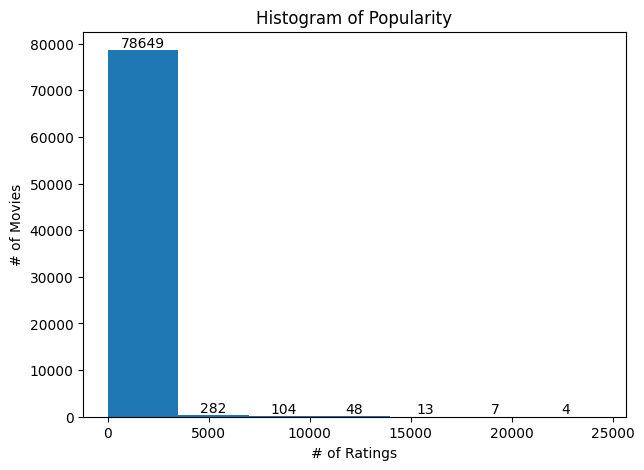

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
_, _, bars = plt.hist(all_ratings['title'].value_counts(), bins=7)
plt.bar_label(bars)
plt.title('Histogram of Popularity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Movies')
plt.show()

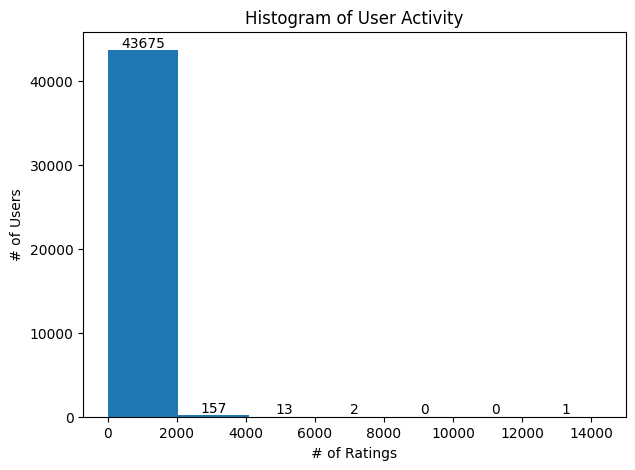

In [21]:
plt.figure(figsize=(7,5))
_, _, bars = plt.hist(all_ratings['userId'].value_counts(), bins=7)
plt.bar_label(bars)
plt.title('Histogram of User Activity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Users')
plt.show()

#average rating and top 20 (too much 5.0)

In [26]:
average_ratings = all_ratings.groupby(["title"])["rating"].mean()
average_ratings.nlargest(100)

,rating
title,
$uperthief: Inside America's Biggest Bank Score (2012),5.0
'Tis the Season to be Merry (2021),5.0
...E fuori nevica! (2014),5.0
1 Message (2011),5.0
1-900 (06) (1994),5.0
...,...
Abduction,5.0
About Sarah,5.0
Abroad: Finding Faith (2018),5.0


#Train, Validation, and Test Data

In [27]:
from sklearn.model_selection import train_test_split

ratings_trainval, ratings_test = train_test_split(all_ratings, test_size=0.1, random_state=42)

ratings_train, ratings_val = train_test_split(ratings_trainval, test_size=0.1, random_state=42)

In [28]:
user_id_train = ratings_train['userId']
item_id_train = ratings_train['movieId']
rating_train = ratings_train['rating']

user_id_test = ratings_test['userId']
item_id_test = ratings_test['movieId']
rating_test = ratings_test['rating']

In [30]:
movies_not_train = list(set(all_ratings['movieId']) -set(item_id_train))
movies_not_train_name = set(all_ratings[all_ratings['movieId'].isin(movies_not_train)]['title'])

print(movies_not_train_name)

{'Tsuruhachi and Tsurujiro (1938)', 'Słaba płeć? (2015)', 'Elevator Movie (2004)', 'Japanese Acrobats (1904)', 'The Beloved Vagabond (1936)', "A Soldier's Love Story (2010)", 'Escape (1948)', 'Neon Lights (2022)', 'Dead and Deader (2006)', 'Wedding Ring (1950)', 'The Holy Man (2005)', 'Three Landscapes (2013)', 'I Not Stupid Too (2006)', 'Bellini e o Demônio (2008)', 'The Life & Crimes of Doris Payne (2013)', 'Kuntur Wachana (1977)', 'Waiting for the Light (1990)', 'Living Room of the Nation, The (Kansakunnan olohuone) (2009)', 'La Recta Provincia (2007)', 'Candlelight in Algeria (1944)', 'The Crown Prince (2006)', 'The Heart and How to Use It (2021)', 'Animals in the Great War (2015)', 'Forbidden to Forbid (2007)', 'Trooper Hook (1957)', 'The Republic Of Love (2004)', 'The Gleiwitz Case (1961)', 'Greetings from Africa (1996)', 'Battle of the V-1 (1958)', 'Attenborough at 90: Behind the Lens (2016)', 'Diego Star (2013)', 'Duchacek Will Fix It (1938)', 'Hong Kong 97 (1994)', 'The Beach 

#Data Load and Batching

In [35]:
import torch
import numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
def df_2_tensor(df, device):
    # return a triplet user_num, item_num, rating from the dataframe
    user_num = np.asarray(df['userId'])
    item_num = np.asarray(df['movieId'])
    rating = np.asarray(df['rating'])
    return torch.from_numpy(user_num).to(device), torch.from_numpy(item_num).to(device), torch.from_numpy(rating).to(device)

In [5]:
train_user_num, train_item_num, train_rating = df_2_tensor(ratings_train,device)

NameError: name 'ratings_train' is not defined

In [37]:
val_user_num, val_item_num, val_rating = df_2_tensor(ratings_val,device)
test_user_num, test_item_num, test_rating = df_2_tensor(ratings_test,device)

Dataset and dataloader


In [1]:
def tensor_2_dataset(user,item,rating):
    # your code here
    # Hint: check the zip function
    return list(zip(user,item,rating))

def make_dataloader(dataset,bs,shuffle):
    # your code here
    return torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=shuffle)

In [2]:
train_dataset = tensor_2_dataset(train_user_num,train_item_num, train_rating)
val_dataset = tensor_2_dataset(val_user_num,val_item_num,val_rating)
test_dataset = tensor_2_dataset(test_user_num, test_item_num, test_rating)

NameError: name 'train_user_num' is not defined